In [32]:
#Land turtle photos used, this time with 20 layers, misclassification swings in the other direction. 
import os
os.getcwd()  # Get Working Directory

'C:\\Users\\Scott\\DroneCourse\\ENVS333\\DeepLearn\\final'

In [33]:
%%time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import tensorflow as tf
import pandas as pd

Wall time: 1.99 ms


In [34]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [35]:
# dimensions of our images.
img_width, img_height = 150, 150

In [36]:
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 350
nb_validation_samples = 100
epochs = 10
batch_size = 20


In [37]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [39]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

#where you can "augment" the data 
#rescale = normalize

In [40]:
#function that allows for indexing and labeling
#number and type of classes
#random generator
training = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',) #binary class not categorical 
                         #categorical 
x,y = training.next()  #x = input # y = output

Found 700 images belonging to 2 classes.


In [41]:
validation = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

x_valid,y_valid = validation.next()



Found 200 images belonging to 2 classes.


In [42]:
y_valid

array([1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000,
       1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000,
       1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000,
       0.000000, 1.000000], dtype=float32)

In [50]:
model = Sequential()
model.add(Conv2D(20, (3, 3), input_shape=input_shape)) #convoulution layer with 32 filters with filter size 3x3
model.add(Activation('relu')) #rectified linear unit vs. sigmoid function #//activation keras
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [52]:
history = model.fit_generator(
    training,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
17/17 [==============================] - 6s 332ms/step - loss: 0.7937 - accuracy: 0.4853 - val_loss: 0.6709 - val_accuracy: 0.5200
Epoch 2/10
17/17 [==============================] - 5s 301ms/step - loss: 0.6848 - accuracy: 0.5265 - val_loss: 0.7065 - val_accuracy: 0.5300
Epoch 3/10
17/17 [==============================] - 5s 315ms/step - loss: 0.6861 - accuracy: 0.5353 - val_loss: 0.6640 - val_accuracy: 0.5400
Epoch 4/10
17/17 [==============================] - 5s 304ms/step - loss: 0.6710 - accuracy: 0.5529 - val_loss: 0.6081 - val_accuracy: 0.4800
Epoch 5/10
17/17 [==============================] - 5s 320ms/step - loss: 0.6595 - accuracy: 0.5794 - val_loss: 0.7165 - val_accuracy: 0.4800
Epoch 6/10
17/17 [==============================] - 5s 295ms/step - loss: 0.6454 - accuracy: 0.6206 - val_loss: 0.8203 - val_accuracy: 0.5000
Epoch 7/10
17/17 [==============================] - 5s 316ms/step - loss: 0.6339 - accuracy: 0.6059 - val_loss: 0.6900 - val_accuracy: 0.5900
Epoch 

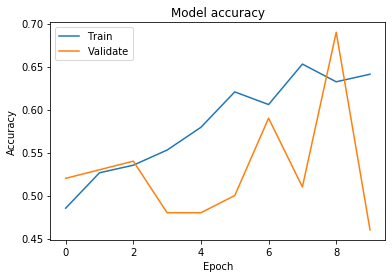

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [54]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

val = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    shuffle = False,
    class_mode='binary')

predictions = model.predict(val)

new_pred =  np.ravel(np.rint(predictions))

y = val.classes;

test = (new_pred-y)
for i in test:
    if i == 0:
        print('Correctly Classified')
    if i == 1:
        print('Incorrectly Classified Alligator as Turtle')
    if i == -1:
        print('Incorrectly Classified Turtle as Alligator')

Found 200 images belonging to 2 classes.
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Incorrectly Classified Alligator as Turtle
Incorrectly Classified Alligator as Turtle
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Incorrectly Classified Alligator as Turtle
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Incorrectly Classified Alligator as Turtle
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly 

In [55]:
pip install tabulate

In [56]:
from tabulate import tabulate
print(tabulate([['Correctly Classified', sum(new_pred-y==0)],
['Incorrectly Classified Alligator as Turtle',sum(new_pred-y==1)],
['Incorrectly Classified Turtle as Alligator',sum(new_pred-y==-1)]],
headers=['Class', 'Number'],tablefmt='fancy_grid'))

print(tabulate([['Correctly Classified', (sum(new_pred-y==0))/len(new_pred-y)],
['Incorrectly Classified',((sum(new_pred-y==1))/len(new_pred-y))+(sum(new_pred-y==-1))/len(new_pred-y)]],  
headers=['Class', 'Fraction'],tablefmt='fancy_grid'))

╒════════════════════════════════════════════╤══════════╕
│ Class                                      │   Number │
╞════════════════════════════════════════════╪══════════╡
│ Correctly Classified                       │      103 │
├────────────────────────────────────────────┼──────────┤
│ Incorrectly Classified Alligator as Turtle │       11 │
├────────────────────────────────────────────┼──────────┤
│ Incorrectly Classified Turtle as Alligator │       86 │
╘════════════════════════════════════════════╧══════════╛
╒════════════════════════╤════════════╕
│ Class                  │   Fraction │
╞════════════════════════╪════════════╡
│ Correctly Classified   │      0.515 │
├────────────────────────┼────────────┤
│ Incorrectly Classified │      0.485 │
╘════════════════════════╧════════════╛


In [67]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [68]:
newpredictions =  np.rint(predictions)

In [63]:
newpredictions
#print(np.shape(newpredictions))
#print(np.shape(validation.classes))


array([[0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.00

Populating the interactive namespace from numpy and matplotlib
0.0
0.0
1.0
1.0
0.0
1.0


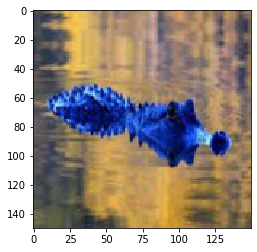

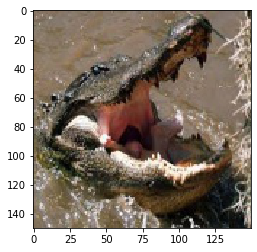

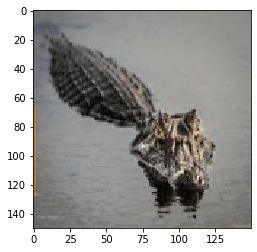

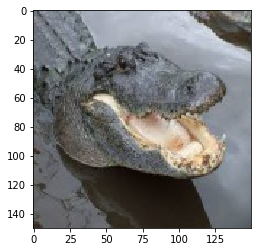

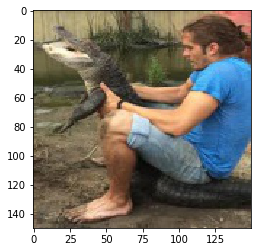

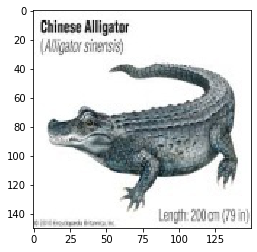

In [65]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = [0,1,2,3,4,5]
for i in index:
    figure()
    img=mpimg.imread(val.filepaths[i])
    imgplot = plt.imshow(img)
    print(new_pred[i])


0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0


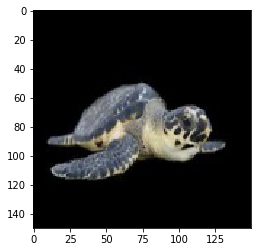

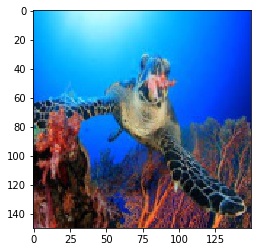

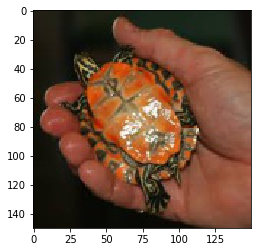

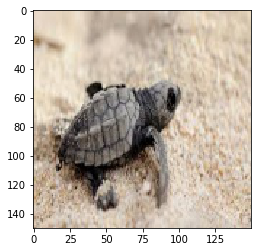

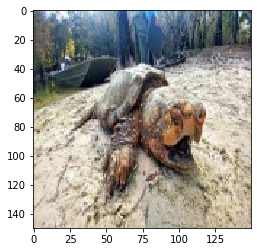

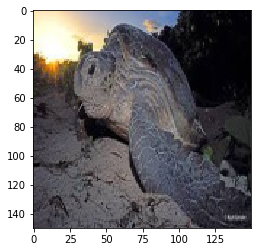

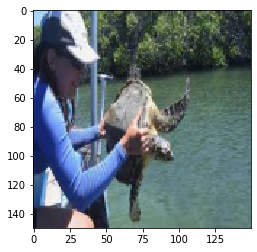

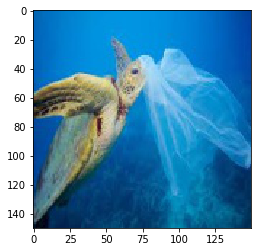

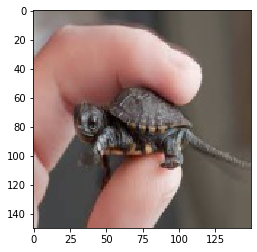

In [70]:
index = [150, 151, 152, 153, 154, 155, 156, 157, 158]

for i in index:
    figure()
    img=mpimg.imread(validation.filepaths[i])
    imgplot = plt.imshow(img)
    print(new_pred[i])